In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import quandl
from sklearn.tree import DecisionTreeRegressor
import numpy as np

quandl.ApiConfig.api_key = '5V93_8BtXNZ6zw_Vnmyy'
stock_data = quandl.get('NYSE/GE', start_date = '2016-12-28', end_date = '2017-12-28')
print(stock_data)

In [22]:
quandl.ApiConfig.api_key = '5V93_8BtXNZ6zw_Vnmyy'## enter your key 
stock_data = quandl.get('EOD/GE', start_date='2016-12-01', end_date='2017-12-31')
#Let's see the data
print(stock_data)

              Open   High      Low  Close      Volume  Dividend  Split  \
Date                                                                     
2016-12-01  30.640  31.46  30.6200  31.39  44697407.0      0.00    1.0   
2016-12-02  31.360  31.49  31.2600  31.34  21395019.0      0.00    1.0   
2016-12-05  31.430  31.45  31.0600  31.11  22138326.0      0.00    1.0   
2016-12-06  31.190  31.24  31.0100  31.17  17573265.0      0.00    1.0   
2016-12-07  31.010  31.60  30.9300  31.60  32896981.0      0.00    1.0   
...            ...    ...      ...    ...         ...       ...    ...   
2017-12-21  17.455  17.69  17.4375  17.47  67864071.0      0.00    1.0   
2017-12-22  17.480  17.56  17.4000  17.50  46357220.0      0.00    1.0   
2017-12-26  17.450  17.66  17.4000  17.43  55337926.0      0.12    1.0   
2017-12-27  17.460  17.63  17.3100  17.38  60126681.0      0.00    1.0   
2017-12-28  17.350  17.40  17.2500  17.36  60916439.0      0.00    1.0   

             Adj_Open   Adj_High    A

In [23]:
data = pd.DataFrame(stock_data)


In [24]:
data.head()
#Share turnover is a measure of stock liquidity calculated by dividing the total 
#number of shares traded over a period by the average number of shares outstanding
#for the period. The higher the share turnover,
#the more liquid company shares are. 

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2016-12-01,30.64,31.46,30.62,31.39,44697407.0,0.0,1.0,27.410744,28.144321,27.392852,28.081699,44697407.0
2016-12-02,31.36,31.49,31.26,31.34,21395019.0,0.0,1.0,28.054861,28.171160,27.965400,28.036969,21395019.0
2016-12-05,31.43,31.45,31.06,31.11,22138326.0,0.0,1.0,28.117483,28.135375,27.786479,27.831209,22138326.0
2016-12-06,31.19,31.24,31.01,31.17,17573265.0,0.0,1.0,27.902778,27.947508,27.741748,27.884885,17573265.0
2016-12-07,31.01,31.60,30.93,31.60,32896981.0,0.0,1.0,27.741748,28.269566,27.670180,28.269566,32896981.0


In [25]:
data.to_csv('GE.csv') #to save for myself with csv

In [26]:
data = pd.read_csv('GE.csv')

In [27]:
data.head()

,Date,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
0,2016-12-01,30.64,31.46,30.62,31.39,44697407.0,0.0,1.0,27.410744,28.144321,27.392852,28.081699,44697407.0
1,2016-12-02,31.36,31.49,31.26,31.34,21395019.0,0.0,1.0,28.054861,28.171160,27.965400,28.036969,21395019.0
2,2016-12-05,31.43,31.45,31.06,31.11,22138326.0,0.0,1.0,28.117483,28.135375,27.786479,27.831209,22138326.0
3,2016-12-06,31.19,31.24,31.01,31.17,17573265.0,0.0,1.0,27.902778,27.947508,27.741748,27.884885,17573265.0
4,2016-12-07,31.01,31.60,30.93,31.60,32896981.0,0.0,1.0,27.741748,28.269566,27.670180,28.269566,32896981.0


In [28]:
data['yesterday_open'] = data['Open'].shift(1) #nan cuz can't get the yesterday's date, first one is always NaN
data['two_days_ago_open'] = data['Open'].shift(2) #shift is to predict yesterdays price if its (1) by one day, just reformatting
#the data, not doing the price prediction yet.

data['yesterday_close'] = data['Close'].shift(1)
data['two_days_ago_close'] = data['Close'].shift(2)

data['yesterday_High'] = data['High'].shift(1)
data['two_days_ago_High'] = data['High'].shift(2)

data['yesterday_Low'] = data['Low'].shift(1)
data['two_days_ago_Low'] = data['Low'].shift(2)

data['yesterday_Volume'] = data['Volume'].shift(1)
data['two_days_ago_Volume'] = data['Volume'].shift(2)

In [29]:
data.head()

,Date,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,...,yesterday_open,two_days_ago_open,yesterday_close,two_days_ago_close,yesterday_High,two_days_ago_High,yesterday_Low,two_days_ago_Low,yesterday_Volume,two_days_ago_Volume
0,2016-12-01,30.64,31.46,30.62,31.39,44697407.0,0.0,1.0,27.410744,28.144321,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-12-02,31.36,31.49,31.26,31.34,21395019.0,0.0,1.0,28.054861,28.171160,...,30.64,NaN,31.39,NaN,31.46,NaN,30.62,NaN,44697407.0,NaN
2,2016-12-05,31.43,31.45,31.06,31.11,22138326.0,0.0,1.0,28.117483,28.135375,...,31.36,30.64,31.34,31.39,31.49,31.46,31.26,30.62,21395019.0,44697407.0
3,2016-12-06,31.19,31.24,31.01,31.17,17573265.0,0.0,1.0,27.902778,27.947508,...,31.43,31.36,31.11,31.34,31.45,31.49,31.06,31.26,22138326.0,21395019.0
4,2016-12-07,31.01,31.60,30.93,31.60,32896981.0,0.0,1.0,27.741748,28.269566,...,31.19,31.43,31.17,31.11,31.24,31.45,31.01,31.06,17573265.0,22138326.0


In [30]:
data.isnull().sum()

Date                   0
Open                   0
High                   0
Low                    0
Close                  0
Volume                 0
Dividend               0
Split                  0
Adj_Open               0
Adj_High               0
Adj_Low                0
Adj_Close              0
Adj_Volume             0
yesterday_open         1
two_days_ago_open      2
yesterday_close        1
two_days_ago_close     2
yesterday_High         1
two_days_ago_High      2
yesterday_Low          1
two_days_ago_Low       2
yesterday_Volume       1
two_days_ago_Volume    2
dtype: int64

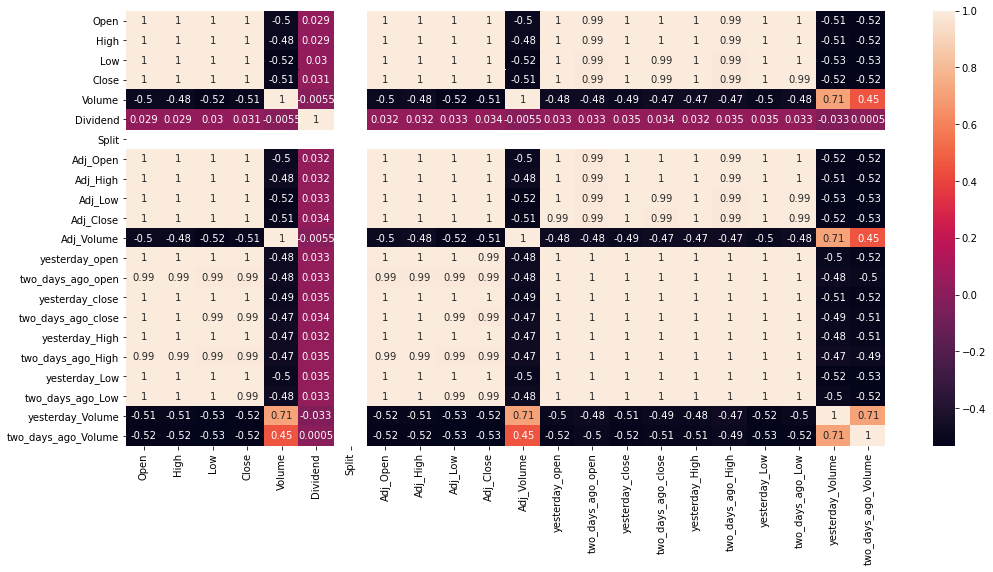

In [31]:
import seaborn as sns
plt.figure(1, figsize = (17, 8))
cor = sns.heatmap(data.corr(), annot = True)

In [32]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividend', 'Split',
       'Adj_Open', 'Adj_High', 'Adj_Low', 'Adj_Close', 'Adj_Volume',
       'yesterday_open', 'two_days_ago_open', 'yesterday_close',
       'two_days_ago_close', 'yesterday_High', 'two_days_ago_High',
       'yesterday_Low', 'two_days_ago_Low', 'yesterday_Volume',
       'two_days_ago_Volume'],
      dtype='object')

In [33]:
data.dropna(inplace = True)

In [34]:
x = data[['yesterday_open', 'two_days_ago_open', 'yesterday_close',
       'two_days_ago_close', 'yesterday_High', 'two_days_ago_High',
       'yesterday_Low', 'two_days_ago_Low', 'yesterday_Volume',
       'two_days_ago_Volume']]
y = data['Open']

In [35]:
x.tail()

,yesterday_open,two_days_ago_open,yesterday_close,two_days_ago_close,yesterday_High,two_days_ago_High,yesterday_Low,two_days_ago_Low,yesterday_Volume,two_days_ago_Volume
266,17.600,17.760,17.45,17.59,17.65,17.80,17.3600,17.5500,75356125.0,65467298.0
267,17.455,17.600,17.47,17.45,17.69,17.65,17.4375,17.3600,67864071.0,75356125.0
268,17.480,17.455,17.50,17.47,17.56,17.69,17.4000,17.4375,46357220.0,67864071.0
269,17.450,17.480,17.43,17.50,17.66,17.56,17.4000,17.4000,55337926.0,46357220.0
270,17.460,17.450,17.38,17.43,17.63,17.66,17.3100,17.4000,60126681.0,55337926.0


In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 0)

In [37]:
Regressor = DecisionTreeRegressor()

In [38]:
Regressor.fit(x_train, y_train)

DecisionTreeRegressor()

In [39]:
test = [31.19, 31.60, 17.455, 15, 18, 12.99, 22, 19, 33.30, 10]

In [40]:
test = np.asarray(test, dtype=np.float32)

In [41]:
prediction = Regressor.predict(test.reshape(1, -1))

In [42]:
model=DecisionTreeRegressor() 
model.fit(x, y)

DecisionTreeRegressor()

In [43]:
model.score(x, 
            y)

1.0

In [44]:
prediction

array([22.14])